<a href="https://colab.research.google.com/github/amanjeetsahu/MovieLens-Data-Analysis/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

# Problem Statement


## Movielens Dataset Analysis
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering in the University of Minnesota. The researchers of this group are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. In particular, we want you to apply the tools of machine learning to predict the ratings.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [0]:
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [0]:
movies= pd.read_table('https://raw.githubusercontent.com/amanjeetsahu/MovieLens-Data-Analysis/master/movies.dat',sep= '::',encoding= "ISO-8859-1" ,header=None)

In [0]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
movies['year'] = movies[1].str.extract('\((.*?)\)', expand=True)
movies[1] = movies[1].str.replace('\((.*?)\)', "")
movies[1] = movies[1].str.rstrip()

In [0]:
movies.head()

,0,1,2,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [0]:
movies.columns= ['MovieId','Title', 'Genre', 'Year']
movies= movies[['MovieId','Year', 'Title', 'Genre']]

In [0]:
movies.head()

,MovieId,Year,Title,Genre
0,1,1995,Toy Story,Animation|Children's|Comedy
1,2,1995,Jumanji,Adventure|Children's|Fantasy
2,3,1995,Grumpier Old Men,Comedy|Romance
3,4,1995,Waiting to Exhale,Comedy|Drama
4,5,1995,Father of the Bride Part II,Comedy


In [0]:
ratings= pd.read_table('https://raw.githubusercontent.com/amanjeetsahu/MovieLens-Data-Analysis/master/ratings.dat',sep= '::',encoding= "ISO-8859-1" ,header=None)

In [0]:
ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [0]:
ratings.columns= ['UserId','MovieId','Rating','Timestamp']

In [0]:
ratings.head()

,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [0]:
users= pd.read_table('https://raw.githubusercontent.com/amanjeetsahu/MovieLens-Data-Analysis/master/users.dat',sep= '::',encoding= "ISO-8859-1" ,header=None)

In [0]:
users.columns= ['UserId','Gender','Age','Occupation','ZipCode']

In [0]:
users.head()

,UserId,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


# Exploratory Data Analysis


## Visualize user age distribution

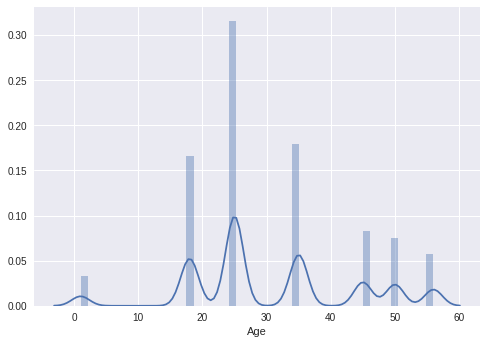

In [0]:
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', color_codes=True)
sns.distplot(users['Age'])

## Visualize overall rating by users

In [0]:
ratings['Rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

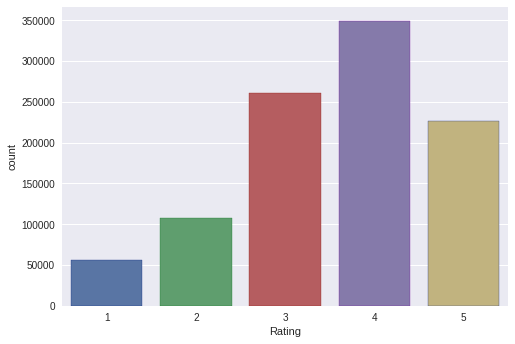

In [0]:
sns.countplot(x="Rating", data=ratings, edgecolor=sns.color_palette("dark", 4))

## Find and visualize the user rating of the movie “Toy Story”

In [0]:
movies.head()

,MovieId,Year,Title,Genre
0,1,1995,Toy Story,Animation|Children's|Comedy
1,2,1995,Jumanji,Adventure|Children's|Fantasy
2,3,1995,Grumpier Old Men,Comedy|Romance
3,4,1995,Waiting to Exhale,Comedy|Drama
4,5,1995,Father of the Bride Part II,Comedy


In [0]:
ratings.head()

,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [0]:
new_movies= movies.merge(ratings, on='MovieId', how='inner')
new_movies.head()

,MovieId,Year,Title,Genre,UserId,Rating,Timestamp
0,1,1995,Toy Story,Animation|Children's|Comedy,1,5,978824268
1,1,1995,Toy Story,Animation|Children's|Comedy,6,4,978237008
2,1,1995,Toy Story,Animation|Children's|Comedy,8,4,978233496
3,1,1995,Toy Story,Animation|Children's|Comedy,9,5,978225952
4,1,1995,Toy Story,Animation|Children's|Comedy,10,5,978226474


In [0]:
toy_story= new_movies.loc[new_movies['Title'] == 'Toy Story']

In [0]:
toy_story['Rating'].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

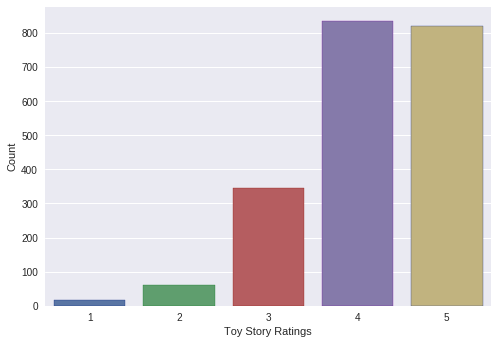

In [0]:
ax= sns.countplot(x="Rating", data=toy_story, edgecolor=sns.color_palette("dark", 4))
ax.set(xlabel='Toy Story Ratings', ylabel='Count')
plt.show()

## Find and visualize the viewership of the movie “Toy Story” by age group

In [0]:
toy_story.head()

,MovieId,Year,Title,Genre,UserId,Rating,Timestamp
0,1,1995,Toy Story,Animation|Children's|Comedy,1,5,978824268
1,1,1995,Toy Story,Animation|Children's|Comedy,6,4,978237008
2,1,1995,Toy Story,Animation|Children's|Comedy,8,4,978233496
3,1,1995,Toy Story,Animation|Children's|Comedy,9,5,978225952
4,1,1995,Toy Story,Animation|Children's|Comedy,10,5,978226474


In [0]:
users.head()

,UserId,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [0]:
users.loc[users.ZipCode == '48067']

,UserId,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
582,583,F,25,0,48067
1509,1510,F,25,1,48067
2097,2098,M,35,20,48067
4516,4517,F,18,1,48067
4951,4952,F,25,14,48067


In [0]:
new_toy_story= toy_story.merge(users, on= 'UserId', how='inner')

In [0]:
new_toy_story.head()

,MovieId,Year,Title,Genre,UserId,Rating,Timestamp,Gender,Age,Occupation,ZipCode
0,1,1995,Toy Story,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,1995,Toy Story,Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,1995,Toy Story,Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,1995,Toy Story,Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,1995,Toy Story,Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [0]:
new_toy_story['Age'].value_counts()

25    790
18    448
35    423
45    143
1     112
50    108
56     53
Name: Age, dtype: int64

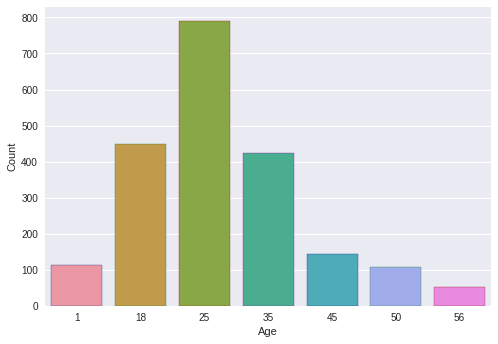

In [0]:
ax = sns.countplot(x="Age", data=new_toy_story, edgecolor=sns.color_palette("dark", 4))
ax.set(xlabel= 'Age', ylabel="Count")
plt.show()

## Find and visualize the top 25 movies by viewership rating

In [0]:
new_merged= movies.merge(ratings , on= 'MovieId', how= 'inner').merge(users, on= 'UserId', how= 'inner')

In [0]:
new_merged.head()

,MovieId,Year,Title,Genre,UserId,Rating,Timestamp,Gender,Age,Occupation,ZipCode
0,1,1995,Toy Story,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,1995,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,1995,Apollo 13,Drama,1,5,978301777,F,1,10,48067
3,260,1977,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,1993,Schindler's List,Drama|War,1,5,978824195,F,1,10,48067


In [0]:
most_rated= new_merged.groupby('Title').size().sort_values(ascending=False)[:25]

In [0]:
most_rated

Title
American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304
L.A.

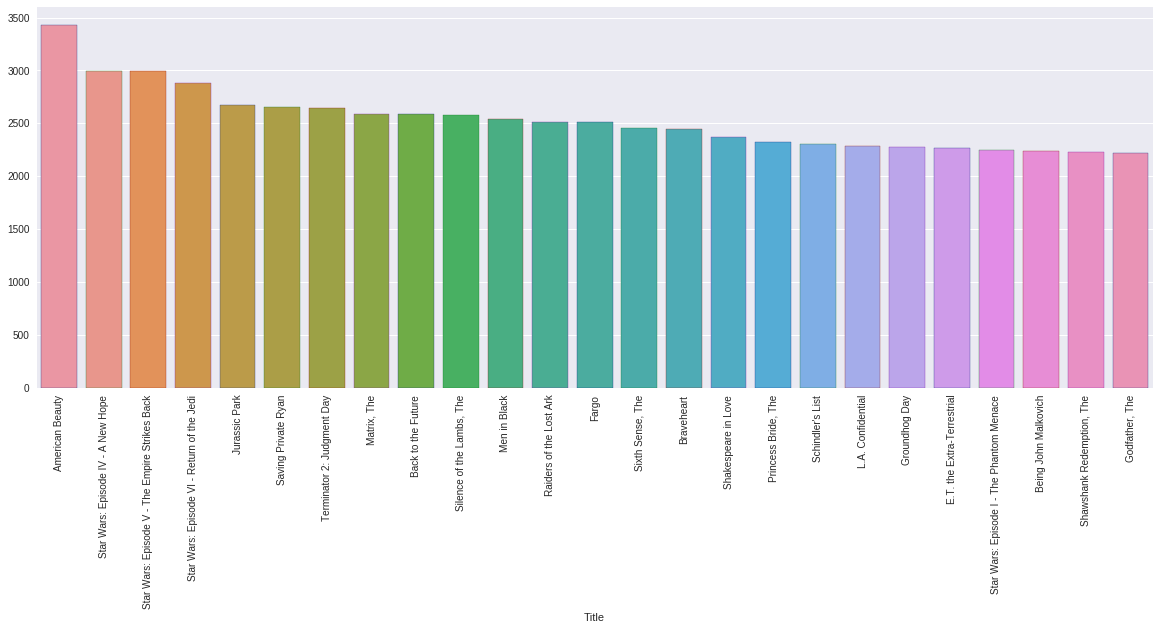

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
ax.set_xticklabels(most_rated.index, rotation=90)
ax= sns.barplot(x=most_rated.index ,y=most_rated, edgecolor=sns.color_palette("dark", 4))

## Find the rating for a particular user of user id = 2696



In [0]:
for_2696= new_merged.loc[ new_merged['UserId']== 2696 ]

In [0]:
for_2696

,MovieId,Year,Title,Genre,UserId,Rating,Timestamp,Gender,Age,Occupation,ZipCode
991035,350,1994,"Client, The",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,1996,Lone Star,Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,1992,Basic Instinct,Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,1982,E.T. the Extra-Terrestrial,Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,1980,"Shining, The",Horror,2696,4,973308710,M,25,7,24210
991040,1270,1985,Back to the Future,Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,1997,Cop Land,Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,1997,L.A. Confidential,Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,1997,"Game, The",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,1997,I Know What You Did Last Summer,Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [0]:
for_2696[['Title', 'Rating']]

,Title,Rating
991035,"Client, The",3
991036,Lone Star,5
991037,Basic Instinct,4
991038,E.T. the Extra-Terrestrial,3
991039,"Shining, The",4
991040,Back to the Future,2
991041,Cop Land,3
991042,L.A. Confidential,4
991043,"Game, The",4
991044,I Know What You Did Last Summer,2


## Visualize the rating data by user of user id = 2696

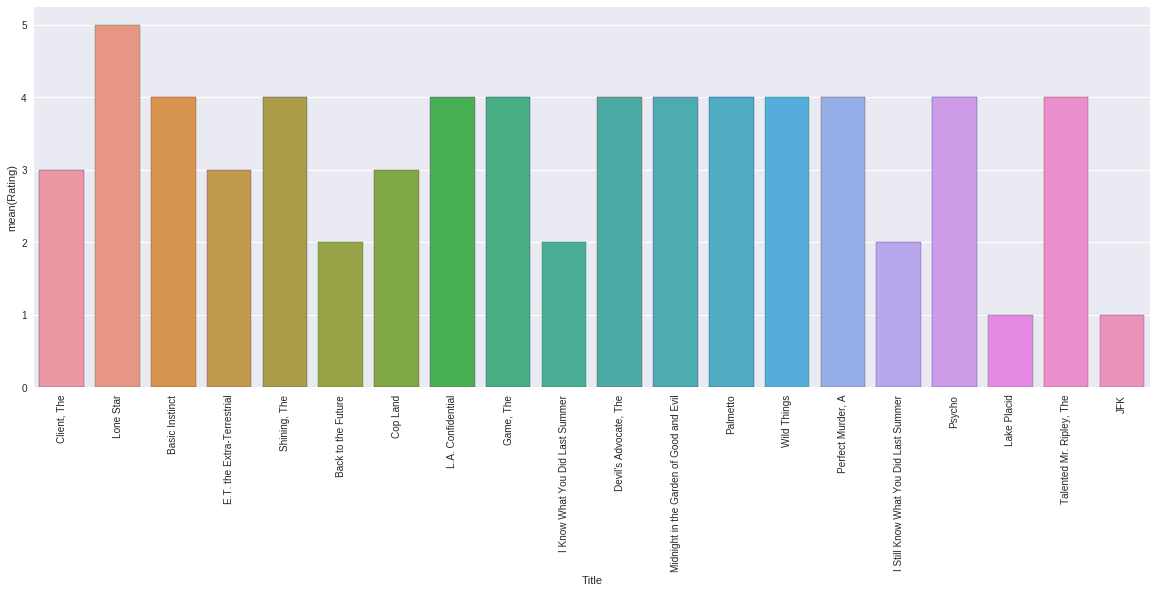

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
ax.set_xticklabels(for_2696['Title'], rotation=90)
ax= sns.barplot(x="Title",y='Rating', data=for_2696, edgecolor=sns.color_palette("dark", 4))
plt.show()

# Feature Selection and Engineering

In [0]:
movies.head()

,MovieId,Year,Title,Genre
0,1,1995,Toy Story,Animation|Children's|Comedy
1,2,1995,Jumanji,Adventure|Children's|Fantasy
2,3,1995,Grumpier Old Men,Comedy|Romance
3,4,1995,Waiting to Exhale,Comedy|Drama
4,5,1995,Father of the Bride Part II,Comedy


In [0]:
genre_list=np.array(movies.Genre.str.split('|'))

In [0]:
genre_list[1]
flat_genre_list = [item for sublist in genre_list for item in sublist]

In [0]:
unique_genres= set(flat_genre_list)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [0]:
for i in unique_genres:
    movies[i] = movies['Genre'].str.contains(i)

In [0]:
movies.head()

,MovieId,Year,Title,Genre,Fantasy,Romance,Adventure,Horror,Documentary,Western,Drama,Musical,Film-Noir,War,Crime,Thriller,Action,Children's,Comedy,Mystery,Animation,Sci-Fi
0,1,1995,Toy Story,Animation|Children's|Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
1,2,1995,Jumanji,Adventure|Children's|Fantasy,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,3,1995,Grumpier Old Men,Comedy|Romance,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,4,1995,Waiting to Exhale,Comedy|Drama,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,5,1995,Father of the Bride Part II,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [0]:
new_merged.head()

,MovieId,Year,Title,Genre,UserId,Rating,Timestamp,Gender,Age,Occupation,ZipCode
0,1,1995,Toy Story,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,1995,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,1995,Apollo 13,Drama,1,5,978301777,F,1,10,48067
3,260,1977,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,1993,Schindler's List,Drama|War,1,5,978824195,F,1,10,48067


In [0]:
for i in unique_genres:
    new_merged[i] = new_merged['Genre'].str.contains(i)

In [0]:
new_merged.head()

,MovieId,Year,Title,Genre,UserId,Rating,Timestamp,Gender,Age,Occupation,ZipCode,Fantasy,Romance,Adventure,Horror,Documentary,Western,Drama,Musical,Film-Noir,War,Crime,Thriller,Action,Children's,Comedy,Mystery,Animation,Sci-Fi
0,1,1995,Toy Story,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
1,48,1995,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
2,150,1995,Apollo 13,Drama,1,5,978301777,F,1,10,48067,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,260,1977,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
4,527,1993,Schindler's List,Drama|War,1,5,978824195,F,1,10,48067,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False


In [0]:
occupation= pd.read_table('https://raw.githubusercontent.com/amanjeetsahu/MovieLens-Data-Analysis/master/u.occupation',sep= '::',encoding= "ISO-8859-1" ,header=None)

In [0]:
occupation_dict= occupation.to_dict()[0]
occupation_dict

{0: 'administrator',
 1: 'artist',
 2: 'doctor',
 3: 'educator',
 4: 'engineer',
 5: 'entertainment',
 6: 'executive',
 7: 'healthcare',
 8: 'homemaker',
 9: 'lawyer',
 10: 'librarian',
 11: 'marketing',
 12: 'none',
 13: 'other',
 14: 'programmer',
 15: 'retired',
 16: 'salesman',
 17: 'scientist',
 18: 'student',
 19: 'technician',
 20: 'writer'}

In [0]:
new_merged.Occupation= new_merged.Occupation.map(occupation_dict)

In [0]:
new_merged.head()

,MovieId,Year,Title,Genre,UserId,Rating,Timestamp,Gender,Age,Occupation,ZipCode,Fantasy,Romance,Adventure,Horror,Documentary,Western,Drama,Musical,Film-Noir,War,Crime,Thriller,Action,Children's,Comedy,Mystery,Animation,Sci-Fi
0,1,1995,Toy Story,Animation|Children's|Comedy,1,5,978824268,F,1,librarian,48067,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
1,48,1995,Pocahontas,Animation|Children's|Musical|Romance,1,5,978824351,F,1,librarian,48067,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
2,150,1995,Apollo 13,Drama,1,5,978301777,F,1,librarian,48067,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,260,1977,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,librarian,48067,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
4,527,1993,Schindler's List,Drama|War,1,5,978824195,F,1,librarian,48067,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False


In [0]:
new_merged.Rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [0]:
new_merged.columns

Index(['MovieId', 'Year', 'Title', 'Genre', 'UserId', 'Rating', 'Timestamp',
       'Gender', 'Age', 'Occupation', 'ZipCode', 'Fantasy', 'Romance',
       'Adventure', 'Horror', 'Documentary', 'Western', 'Drama', 'Musical',
       'Film-Noir', 'War', 'Crime', 'Thriller', 'Action', 'Children's',
       'Comedy', 'Mystery', 'Animation', 'Sci-Fi'],
      dtype='object')

In [0]:
df= new_merged[['Gender', 'Age', 'Occupation','Animation', 'War', 'Fantasy',
       'Adventure', "Children's", 'Comedy', 'Drama', 'Action', 'Romance',
       'Crime', 'Horror', 'Musical', 'Film-Noir', 'Thriller', 'Documentary',
       'Western', 'Mystery', 'Sci-Fi', 'Rating']]

In [0]:
df.head()

,Gender,Age,Occupation,Animation,War,Fantasy,Adventure,Children's,Comedy,Drama,Action,Romance,Crime,Horror,Musical,Film-Noir,Thriller,Documentary,Western,Mystery,Sci-Fi,Rating
0,F,1,librarian,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,5
1,F,1,librarian,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,5
2,F,1,librarian,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,5
3,F,1,librarian,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,4
4,F,1,librarian,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,5


### Chi-Squared Test of independence

**H0:There is no statistically significant relationship between Gender and Ratings.**

**Ha:There is a statistically significant relationship between Gender and Rating.**

In [0]:
#contingency Table
contingency_table = pd.crosstab(df['Gender'], df['Rating'], margins= True)
contingency_table.head()

Rating,1,2,3,4,5,All
Gender,,,,,,
F,13347,24548,62966,87033,58546,246440
M,42827,83009,198231,261938,167764,753769
All,56174,107557,261197,348971,226310,1000209


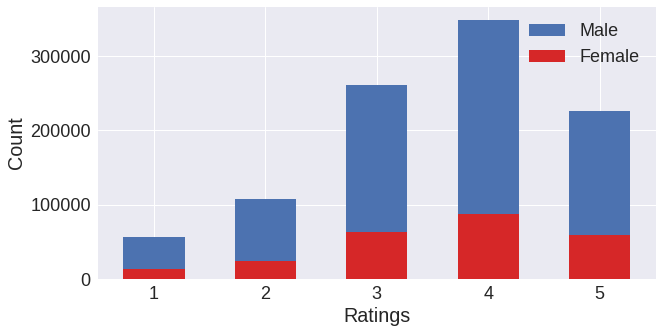

In [0]:
#Assigns the frequency values
malecount = contingency_table.iloc[0][0:5].values
femalecount = contingency_table.iloc[1][0:5].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["1","2","3","4","5"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [0]:
f_obs = np.array([contingency_table.iloc[0][0:5].values,
                  contingency_table.iloc[1][0:5].values])
f_obs

array([[ 13347,  24548,  62966,  87033,  58546],
       [ 42827,  83009, 198231, 261938, 167764]])

In [0]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(455.860738111417, 2.348561132924984e-97, 4)

The X2 = ~456, p-value = ~0 and degrees of freedom = 4

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'Gender' and the 'Rating' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.

### Chi-Squared Test of independence

**H0:There is no statistically significant relationship between Occupation and Ratings.**

**Ha:There is a statistically significant relationship between Occupation and Rating.**

In [0]:
contingency_table = pd.crosstab(df['Occupation'], df['Rating'], margins= True)
contingency_table

Rating,1,2,3,4,5,All
Occupation,,,,,,
administrator,7892,14679,35494,44256,28178,130499
artist,4756,9054,22361,30577,18603,85351
doctor,3062,5486,12919,16899,11702,50068
educator,1521,3083,7958,11236,7825,31623
engineer,9004,15418,33119,43219,30272,131032
entertainment,1070,2552,6446,7127,4655,21850
executive,2046,3332,9058,13500,9269,37205
healthcare,5076,10978,28054,38273,23044,105425
homemaker,176,292,820,929,489,2706


In [0]:
occupation[0].values

array(['administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer'],
      dtype=object)

In [0]:
len(occupation[0].values)

21

In [0]:
contingency_table.iloc[0][0:5].values

array([ 7892, 14679, 35494, 44256, 28178])

In [0]:
f_obs =[]
for i in range(0, len(occupation[0].values)):
    f_obs.append(contingency_table.iloc[i][0:5].values)

In [0]:
f_obs= np.array(f_obs)
f_obs

array([[ 7892, 14679, 35494, 44256, 28178],
       [ 4756,  9054, 22361, 30577, 18603],
       [ 3062,  5486, 12919, 16899, 11702],
       [ 1521,  3083,  7958, 11236,  7825],
       [ 9004, 15418, 33119, 43219, 30272],
       [ 1070,  2552,  6446,  7127,  4655],
       [ 2046,  3332,  9058, 13500,  9269],
       [ 5076, 10978, 28054, 38273, 23044],
       [  176,   292,   820,   929,   489],
       [  393,  1045,  3182,  4170,  2555],
       [ 2058,  2570,  5392,  7448,  5822],
       [ 1337,  2056,  4814,  7287,  5069],
       [ 2578,  5675, 14382, 20909, 13670],
       [  405,  1176,  3274,  5060,  3839],
       [ 2345,  5160, 12696, 17593, 11315],
       [  887,  2271,  5571,  8568,  5654],
       [ 2051,  4980, 12355, 16733,  9902],
       [ 3351,  7193, 19908, 26155, 16209],
       [  583,  1295,  3655,  4238,  2315],
       [ 1417,  1835,  3991,  4482,  3179],
       [ 4166,  7427, 15748, 20312, 12744]])

In [0]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(5370.499189940039, 0.0, 80)

The X2 = ~5370, p-value = 0 and degrees of freedom = 80 *((Number of Rows -1) x (Number of columns - 1))*

With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'Occupation' and the 'Rating' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.

In [0]:
list(unique_genres)

['Fantasy',
 'Romance',
 'Adventure',
 'Horror',
 'Documentary',
 'Western',
 'Drama',
 'Musical',
 'Film-Noir',
 'War',
 'Crime',
 'Thriller',
 'Action',
 "Children's",
 'Comedy',
 'Mystery',
 'Animation',
 'Sci-Fi']

In [0]:
df[list(unique_genres)]= df[list(unique_genres)].astype(int)

In [0]:
df.head()

,Gender,Age,Occupation,Animation,War,Fantasy,Adventure,Children's,Comedy,Drama,Action,Romance,Crime,Horror,Musical,Film-Noir,Thriller,Documentary,Western,Mystery,Sci-Fi,Rating
0,F,1,librarian,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5
1,F,1,librarian,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,5
2,F,1,librarian,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,F,1,librarian,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4
4,F,1,librarian,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
df = df.join(pd.get_dummies(df.Occupation))

In [0]:
df= df.drop('Occupation', axis=1)

In [0]:
df.head()

,Gender,Age,Animation,War,Fantasy,Adventure,Children's,Comedy,Drama,Action,Romance,Crime,Horror,Musical,Film-Noir,Thriller,Documentary,Western,Mystery,Sci-Fi,Rating,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,F,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,F,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,F,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,F,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,F,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
set(df.Age)

{1, 18, 25, 35, 45, 50, 56}

In [0]:
for i in list(unique_genres):
    print(i,":", df.loc[df.Age == 1][i].sum())

Fantasy : 1360
Romance : 3599
Adventure : 3998
Horror : 2211
Documentary : 130
Western : 335
Drama : 7483
Musical : 1647
Film-Noir : 330
War : 1578
Crime : 1701
Thriller : 4824
Action : 6578
Children's : 4337
Comedy : 11162
Mystery : 920
Animation : 2449
Sci-Fi : 4178


*There is something ambiguous in the Age column, I don't think a 1 Year old kid will watch movies and will rate it. These values might be for less than 18 years of age. So, Its best to remove these columns from the data frame.*

In [0]:
df.drop(df.loc[df.Age == 1].index, inplace= True)

In [0]:
df= df.reset_index()
df= df.drop('index', axis=1)

In [0]:
df.head()

,Gender,Age,Animation,War,Fantasy,Adventure,Children's,Comedy,Drama,Action,Romance,Crime,Horror,Musical,Film-Noir,Thriller,Documentary,Western,Mystery,Sci-Fi,Rating,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,F,50,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,F,50,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,F,50,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,F,50,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,F,50,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


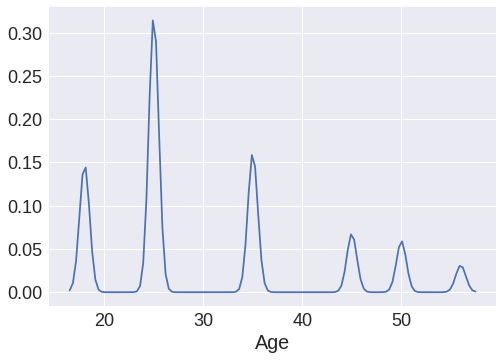

In [0]:
# Check for dependency of ratings on Age
# Distribution of Age
sns.distplot(df.Age, hist= False)

### Shapiro- Wilk Test of Normality 

**H0: Age feature is normal.**

In [0]:
#Check for nomality of Age
# Shapiro- Wilk Test
from scipy.stats import shapiro
stat, p= shapiro(df.Age)
print(stat, p)

0.8496972322463989 0.0


*P value(0.0) returned is less than 0.05, then the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population. now lets check for QQ Plots*

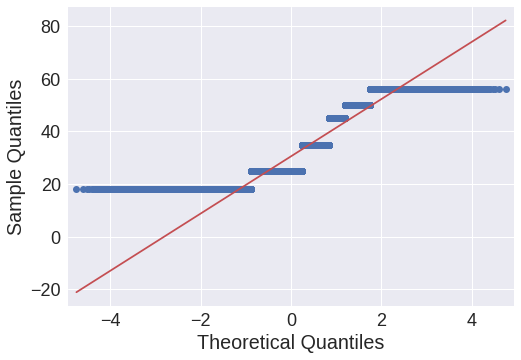

In [0]:
import statsmodels.api as sm
import pylab
sm.qqplot(df.Age, loc = 4, scale = 3, line='s')
pylab.show()

*This QQ plot shows that that age column is not normally distributed*.

So to check the dependency between Age and ratings we will use a non parametric test i.e. Mann-Whitney test

In [0]:
# Mann-Whitney test
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df.Age, df.Rating)
print(stat, p)

0.0 0.0


In [0]:
df= df.drop('Age', axis=1)

*P value(0.0) returned is less than 0.05, then the null hypothesis is rejected and there is evidence that the distributions are different. Hence It is best to drop Age from the features set.

In general Age might affect the ratings for a particular variable(i.e lower age groups might will rate animated movies most often and it is obvious that they will rate animated movies with higher values), but it will not affect the overall ratings.

In [0]:
df.shape

(972998, 41)

In [0]:
df.Gender.value_counts()

M    735385
F    237613
Name: Gender, dtype: int64

In [0]:
Gender_dict= {'F': 1, 'M': 0}

In [0]:
df.Gender= df.Gender.map(Gender_dict)

In [0]:
df.head()

,Gender,Animation,War,Fantasy,Adventure,Children's,Comedy,Drama,Action,Romance,Crime,Horror,Musical,Film-Noir,Thriller,Documentary,Western,Mystery,Sci-Fi,Rating,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


*Data is cleaned and well prepared for to build the model*

In [0]:
df.columns

Index(['Gender', 'Animation', 'War', 'Fantasy', 'Adventure', 'Children's',
       'Comedy', 'Drama', 'Action', 'Romance', 'Crime', 'Horror', 'Musical',
       'Film-Noir', 'Thriller', 'Documentary', 'Western', 'Mystery', 'Sci-Fi',
       'Rating', 'administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer'],
      dtype='object')

In [0]:
X= df.drop('Rating', axis=1)
Y= df[['Rating']]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=5, stratify= df.Rating)

In [0]:
X_train.head()

,Gender,Animation,War,Fantasy,Adventure,Children's,Comedy,Drama,Action,Romance,Crime,Horror,Musical,Film-Noir,Thriller,Documentary,Western,Mystery,Sci-Fi,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
545252,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
379560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
276921,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
654500,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
472053,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_test.head()

,Gender,Animation,War,Fantasy,Adventure,Children's,Comedy,Drama,Action,Romance,Crime,Horror,Musical,Film-Noir,Thriller,Documentary,Western,Mystery,Sci-Fi,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
611972,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
275050,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
280905,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
911685,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
963551,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train.head()

,Rating
545252,4
379560,4
276921,3
654500,3
472053,3


In [0]:
y_test.head()

,Rating
611972,4
275050,3
280905,4
911685,4
963551,3


In [0]:
X_train.shape, X_test.shape

((778398, 40), (194600, 40))

In [0]:
y_train.shape, y_test.shape

((778398, 1), (194600, 1))

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train= scaler.fit_transform(y_train).ravel()
y_test= scaler.transform(y_test).ravel()

In [0]:
y_train, y_test

(array([0.75, 0.75, 0.5 , ..., 0.  , 0.75, 0.5 ]),
 array([0.75, 0.5 , 0.75, ..., 0.75, 0.75, 1.  ]))

In [0]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:
mod0 = sm.OLS(y_train, X_train)
res = mod0.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     796.7
Date:                Fri, 29 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:01:49   Log-Likelihood:                -94508.
No. Observations:              778398   AIC:                         1.891e+05
Df Residuals:                  778358   BIC:                         1.896e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Gender            0.0090      0.001     11.850

In [0]:
y_pred= mod0.predict(res.params, X_test)

In [0]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)) 

0.039525769792749466 0.07455353486950585


In [0]:
# Regressor with Sochastic Gradient Descent optimiser
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(max_iter= 100, penalty=None, eta0= 0.001)
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
y_pred= sgd_reg.predict(X_test)

In [0]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)) 

0.03952463311607468 0.07455362310015425


In [0]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.001, solver= "cholesky" , max_iter= 200)
ridge_reg.fit(X_train, y_train)
y_pred= ridge_reg.predict(X_test)

In [0]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)) 

0.03952576974894351 0.07455353487290613


In [0]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.0001, max_iter=500)
lasso_reg.fit(X_train, y_train)
y_pred= lasso_reg.predict(X_test)

In [0]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.03928712030668302 0.0745720592215618


In [0]:
#Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net= ElasticNet(alpha=0.0001, l1_ratio= 0.5)
elastic_net.fit(X_train, y_train)
y_pred= elastic_net.predict(X_test)

In [0]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.03942193044922815 0.07456159504423471


In [0]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( bootstrap= True, max_depth= 100,max_features= 3,min_samples_leaf= 5,min_samples_split= 12, n_estimators= 500)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [115]:
print(r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.08243350795799997 0.07122296810064588


In [116]:
# Perform 3-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(rf, X_train, y_train, cv=3)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.08079986 0.08039735 0.08009186]


In [117]:
# Make cross validated predictions
predictions = cross_val_predict(rf, X_train, y_train, cv=3)
print("Predictions: ", predictions)

Predictions:  [0.69588258 0.71985836 0.62294969 ... 0.4774495  0.65639288 0.8019238 ]


In [118]:
accuracy = metrics.r2_score(y_train, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.08041984118817502


*rf is the final model which we got after some parameter tweaking and triying out every model.*